In [91]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [92]:
df = pd.read_csv("daily-total-female-births.csv",index_col=[0],parse_dates=[0])

In [93]:
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [94]:
type(df)

pandas.core.frame.DataFrame

In [95]:
df_values = df.values
df_series = pd.read_csv("daily-total-female-births.csv",index_col=[0],parse_dates=[0],squeeze=True)

In [96]:
print(type(df_values))
print(type(df_series))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [97]:
df.size

365

In [98]:
df.describe()

,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


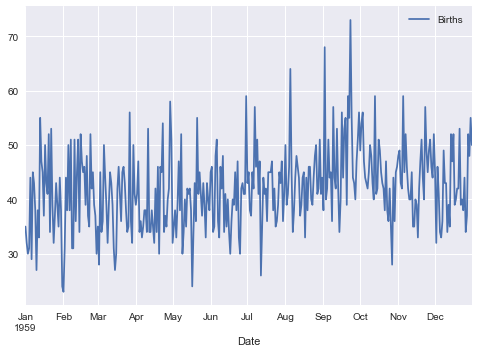

In [99]:
df.plot()
plt.show()

In [100]:
# Moving Average
df_mean = df.rolling(window=20).mean()

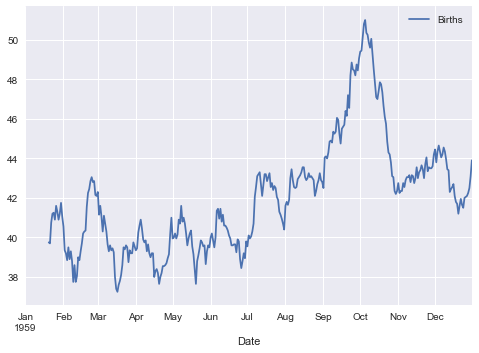

In [101]:
df_mean.plot()
plt.show()

In [102]:
df_values = pd.DataFrame(df_values,dtype=np.int64)
birth_df = pd.concat([df_values,df_values.shift(1)],axis=1)

In [103]:
birth_df.head()

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [104]:
birth_df.columns = ['Actual_birth','Forecast_birth']

In [105]:
birth_df.head()

,Actual_birth,Forecast_birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [106]:
birth_error = mean_squared_error(birth_df[1:].Actual_birth,birth_df[1:].Forecast_birth)

In [107]:
birth_error

84.22252747252747